In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from nltk.corpus import stopwords
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df1 = pd.read_csv('C:/Users/ANKIT/Desktop/Stryve/final3.csv')

In [3]:
df2 = pd.read_csv('C:/Users/ANKIT/Desktop/Stryve/final4.csv')

In [4]:
len(df1)

63

In [5]:
df1.isnull().sum()

name           0
rating         7
price         10
review         7
brand          1
link           0
product_id     0
dtype: int64

In [6]:
df1.drop(['link'],axis=1,inplace=True)

In [7]:
df1 = df1.reset_index(drop=True)

In [8]:
df1['review'] = pd.to_numeric(df1.review, errors='coerce')

In [9]:
df1['price'] = pd.to_numeric(df1.price, errors='coerce')

In [11]:
df1.price.mean()

22.308823529411775

In [12]:
df1.price.median()

20.5

In [13]:
df1['price'] = df1['price'].fillna(df1['price'].mean())

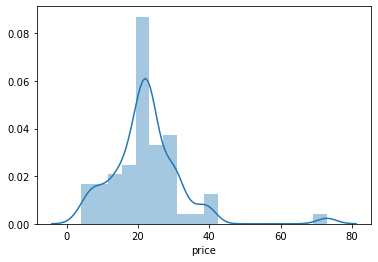

In [15]:
sns.distplot(df1.price)

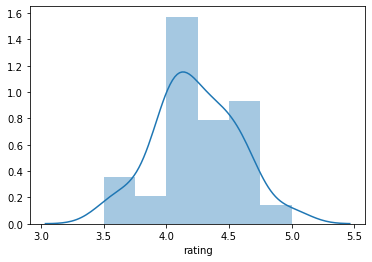

In [16]:
sns.distplot(df1.rating)

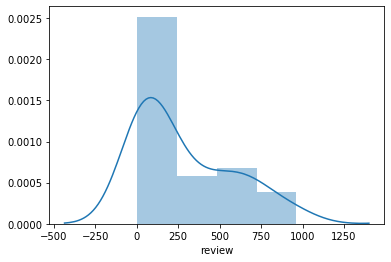

In [17]:
sns.distplot(df1.review)

In [18]:
df1.corr()

rating     price    review
rating  1.000000 -0.087302  0.089102
price  -0.087302  1.000000 -0.041167
review  0.089102 -0.041167  1.000000

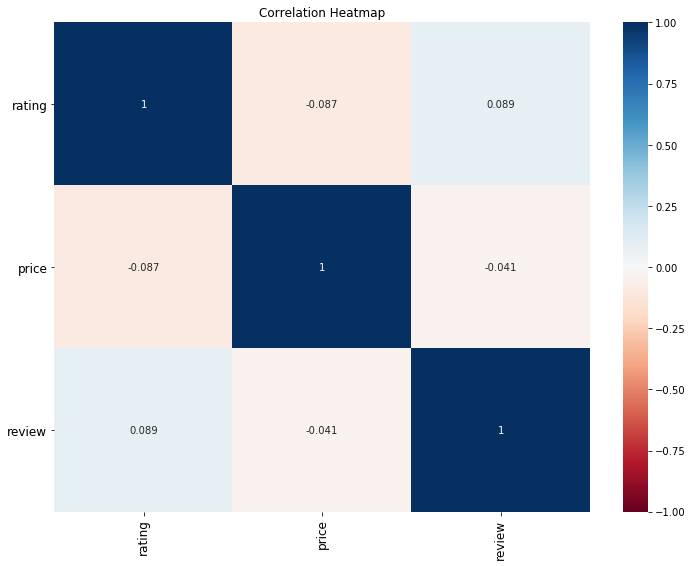

In [19]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df1.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

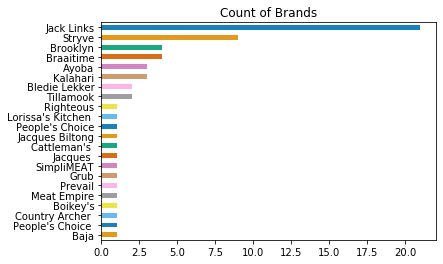

In [108]:
df1.brand.value_counts().plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Count of Brands').invert_yaxis()

Text(0.5, 1.0, 'Price Vs Review based on Brand')

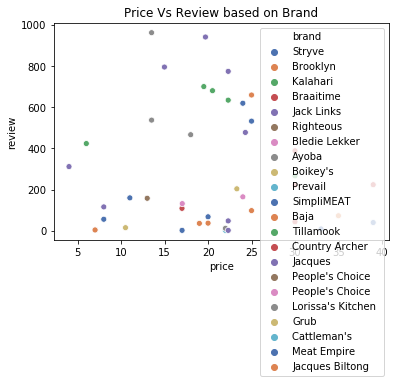

In [118]:
sns.scatterplot(data=df1, x="price", y="review", hue="brand", palette="deep")
ax = plt.gca()
ax.set_title("Price Vs Review based on Brand")

Text(0.5, 1.0, 'Sum of Reviews Vs Brand Name')

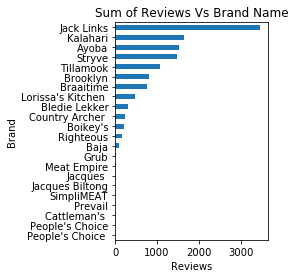

In [28]:
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'review': 'sum'}).sort_values('review').plot.barh(x='brand',legend=False, ax=ax1)

ax1.set_xlabel('Reviews')
ax1.set_ylabel('Brand')
ax1.set_title('Sum of Reviews Vs Brand Name')

Text(0.5, 1.0, 'Price Mean Vs Brand Name')

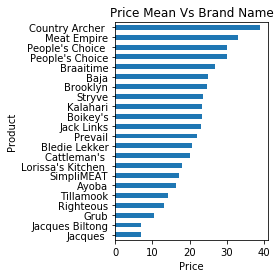

In [29]:
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'price': 'mean'}).sort_values('price').plot.barh(x='brand',legend=False, ax=ax1)
ax1.set_xlabel('Price')
ax1.set_ylabel('Product')
ax1.set_title('Price Mean Vs Brand Name')

Text(0.5, 1.0, 'Reviews Vs Brand Name')

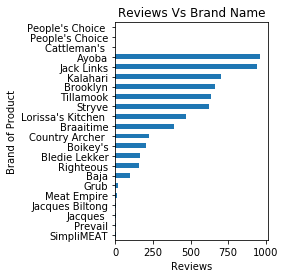

In [30]:
ax1=plt.subplot(121)
df1.groupby(['brand'], as_index=False).agg({'review': 'max'}).sort_values('review').plot.barh(x='brand',legend=False, ax=ax1)
ax1.set_xlabel('Reviews')
ax1.set_ylabel('Brand of Product')
ax1.set_title('Reviews Vs Brand Name')

In [31]:
df2.drop_duplicates(inplace = True)

In [36]:
df2.drop(['date','geography','customer_id','user_id'],axis=1,inplace=True)

In [37]:
df2.head()

name  ratings  product_id  \
0             Nately      1.0  B07JFB6PC7   
1                Jax      2.0  B07JFB6PC7   
2        Kate Miller      5.0  B07JFB6PC7   
3             lowtek      3.0  B07JFB6PC7   
4  S Armstrong Elias      5.0  B07JFB6PC7   

                                       reviews_clean  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                    tags_clean  
0                          this is not biltong  
1  includes sugar and carbs. listing is wrong.  
2                          easy protein snack!  
3                  tasty but not keto friendly  
4                            excellent biltong

In [38]:
df2.rename(columns={"name": "user_name", "ratings": "user_ratings"},inplace=True)

In [40]:
df2['user_ratings'] = pd.to_numeric(df2.user_ratings, errors='coerce')

In [43]:
df2['word_count'] = df2['reviews_clean'].apply(lambda x: len(str(x).split(" ")))

In [45]:
df2['lowercase'] = df2['reviews_clean'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df2.head()

user_name  user_ratings  product_id  \
0             Nately           1.0  B07JFB6PC7   
1                Jax           2.0  B07JFB6PC7   
2        Kate Miller           5.0  B07JFB6PC7   
3             lowtek           3.0  B07JFB6PC7   
4  S Armstrong Elias           5.0  B07JFB6PC7   

                                       reviews_clean  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                    tags_clean  word_count  \
0                          this is not biltong         171   
1  includes sugar and carbs. listing is wrong.          64   
2                          easy protein snack!         167   
3                  tasty but not keto friendly         107   
4                            excellent biltong          86   

                                           lowercase  
0  very disappointed. we found stryve at the loca...  
1  the listing for this product is wrong. it does...  
2  finding clean, minimally processed protein sna...  
3  brown sugar and raisin juice concentrate = sug...  
4  i learned to love biltong while living in engl...

In [46]:
df2['punctuation'] = df2['lowercase'].str.replace('[^\w\s]','')
df2.head()

user_name  user_ratings  product_id  \
0             Nately           1.0  B07JFB6PC7   
1                Jax           2.0  B07JFB6PC7   
2        Kate Miller           5.0  B07JFB6PC7   
3             lowtek           3.0  B07JFB6PC7   
4  S Armstrong Elias           5.0  B07JFB6PC7   

                                       reviews_clean  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                    tags_clean  word_count  \
0                          this is not biltong         171   
1  includes sugar and carbs. listing is wrong.          64   
2                          easy protein snack!         167   
3                  tasty but not keto friendly         107   
4                            excellent biltong          86   

                                           lowercase  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                         punctuation  
0  very disappointed we found stryve at the local...  
1  the listing for this product is wrong it does ...  
2  finding clean minimally processed protein snac...  
3  brown sugar and raisin juice concentrate  suga...  
4  i learned to love biltong while living in engl...

In [49]:
stop_words = stopwords.words('english')

In [50]:
df2['clean'] = df2['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df2.head()

user_name  user_ratings  product_id  \
0             Nately           1.0  B07JFB6PC7   
1                Jax           2.0  B07JFB6PC7   
2        Kate Miller           5.0  B07JFB6PC7   
3             lowtek           3.0  B07JFB6PC7   
4  S Armstrong Elias           5.0  B07JFB6PC7   

                                       reviews_clean  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                    tags_clean  word_count  \
0                          this is not biltong         171   
1  includes sugar and carbs. listing is wrong.          64   
2                          easy protein snack!         167   
3                  tasty but not keto friendly         107   
4                            excellent biltong          86   

                                           lowercase  \
0  very disappointed. we found stryve at the loca...   
1  the listing for this product is wrong. it does...   
2  finding clean, minimally processed protein sna...   
3  brown sugar and raisin juice concentrate = sug...   
4  i learned to love biltong while living in engl...   

                                         punctuation  \
0  very disappointed we found stryve at the local...   
1  the listing for this product is wrong it does ...   
2  finding clean minimally processed protein snac...   
3  brown sugar and raisin juice concentrate  suga...   
4  i learned to love biltong while living in engl...   

                                               clean  
0  disappointed found stryve local walmart liked ...  
1  listing product wrong carbs brown sugar one in...  
2  finding clean minimally processed protein snac...  
3  brown sugar raisin juice concentrate sugar ket...  
4  learned love biltong living england product go...

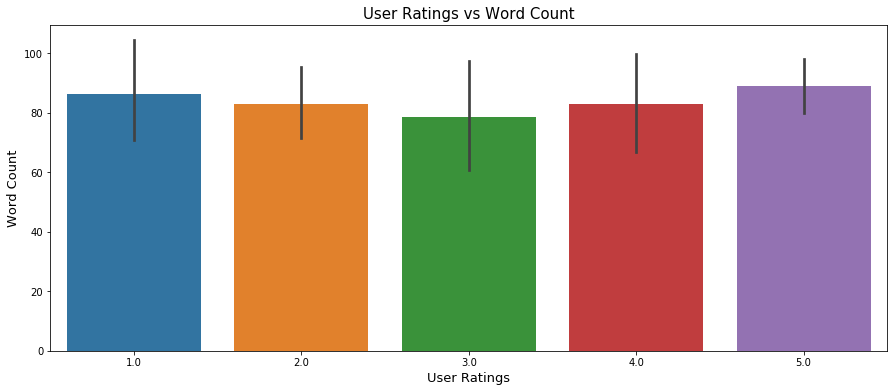

In [74]:
plt.figure(figsize=(15,6))
sns.barplot(x='user_ratings', y='word_count', data=df2)
plt.xlabel('User Ratings', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.title('User Ratings vs Word Count', fontsize=15)
plt.show();

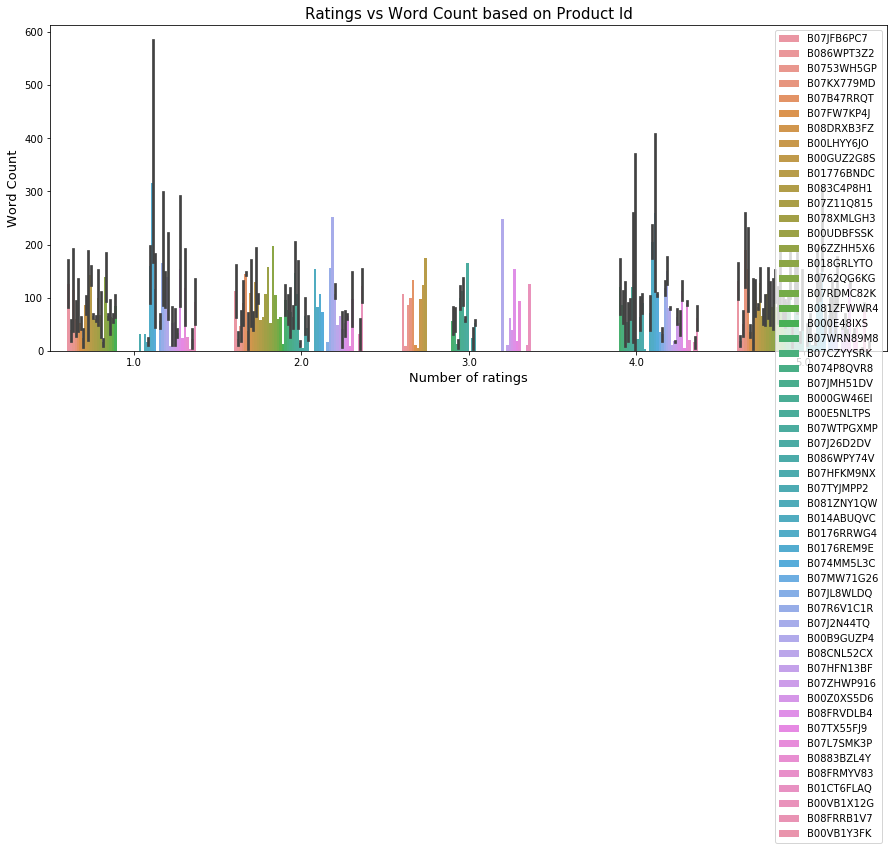

In [119]:
plt.figure(figsize=(15,6))
sns.barplot(x='user_ratings', y='word_count', hue='product_id', data=df2)
plt.xlabel('Number of ratings', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.title('Ratings vs Word Count based on Product Id', fontsize=15)
plt.legend(loc=1)
plt.show();

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
#!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [57]:
comment = df2['clean']
sia = SIA()
results = []

for line in comment:
    pol_score = sia.polarity_scores(line)
    pol_score['comment'] = line
    results.append(pol_score)

In [68]:
df3 = pd.DataFrame.from_records(results)

In [69]:
df3['label'] = 0
df3.loc[df3['compound'] >= 0.4891, 'label'] = 1
df3.loc[df3['compound'] <= 0.4891, 'label'] = -1
df3.tail()

neg    neu    pos  compound  \
499  0.042  0.576  0.382    0.8807   
500  0.068  0.599  0.334    0.8356   
501  0.000  0.192  0.808    0.6369   
502  0.000  0.775  0.225    0.4404   
503  0.000  0.336  0.664    0.8360   

                                               comment  label  
499  good quality product jerky well favored right ...      1  
500  everyone likes sweet flavor added beef jerky m...      1  
501                                         love links      1  
502  good taste soft enough break fingerscant get e...     -1  
503         chewing tender delicious best price around      1

In [70]:
text1 = "".join(review for review in df3[df3.label == 1].comment)

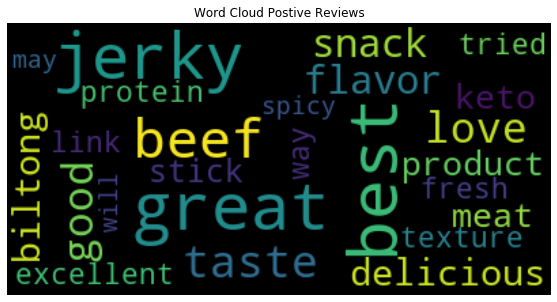

In [104]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text1)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Postive Reviews')
plt.show()

In [72]:
text2 = "".join(review for review in df3[df3.label == -1].comment)

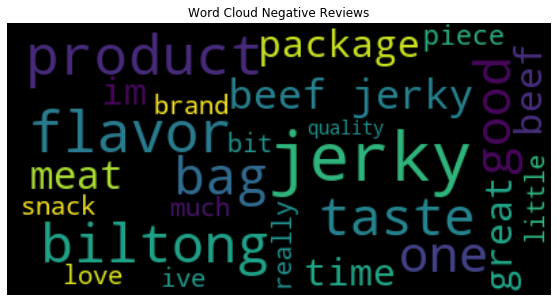

In [105]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text2)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Negative Reviews')
plt.show()

In [93]:
comment = df2['tags_clean']
sia = SIA()
results = []

for line in comment:
    pol_score = sia.polarity_scores(line)
    pol_score['comment'] = line
    results.append(pol_score)

In [95]:
df4 = pd.DataFrame.from_records(results)
df4

neg    neu    pos  compound  \
0    0.000  1.000  0.000    0.0000   
1    0.341  0.659  0.000   -0.4767   
2    0.000  0.385  0.615    0.4926   
3    0.463  0.537  0.000   -0.5334   
4    0.000  0.213  0.787    0.5719   
..     ...    ...    ...       ...   
499  0.000  0.000  1.000    0.5267   
500  0.000  0.229  0.771    0.5204   
501  0.000  0.185  0.815    0.6588   
502  0.000  1.000  0.000    0.0000   
503  0.000  0.000  1.000    0.7959   

                                         comment  
0                            this is not biltong  
1    includes sugar and carbs. listing is wrong.  
2                            easy protein snack!  
3                    tasty but not keto friendly  
4                              excellent biltong  
..                                           ...  
499                                        yummy  
500                                  sweet? why?  
501                                 great taste!  
502                 my favotite from jacks links  
503                                 yummy yummy!  

[504 rows x 5 columns]

In [96]:
df4['label'] = 0
df4.loc[df4['compound'] >= 0.4926, 'label'] = 1
df4.loc[df4['compound'] <= 0.4926, 'label'] = -1
df4.tail()

neg    neu    pos  compound                       comment  label
499  0.0  0.000  1.000    0.5267                         yummy      1
500  0.0  0.229  0.771    0.5204                   sweet? why?      1
501  0.0  0.185  0.815    0.6588                  great taste!      1
502  0.0  1.000  0.000    0.0000  my favotite from jacks links     -1
503  0.0  0.000  1.000    0.7959                  yummy yummy!      1

In [97]:
text1 = "".join(review for review in df4[df4.label == 1].comment)

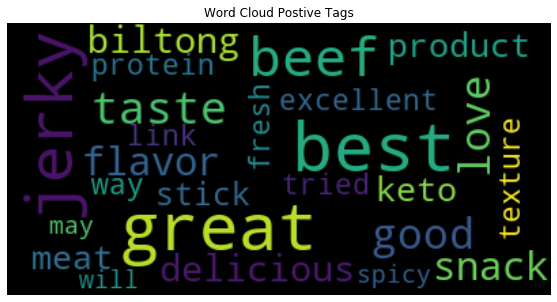

In [106]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text1)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Postive Tags')
plt.show()

In [99]:
text2 = "".join(review for review in df3[df4.label == -1].comment)

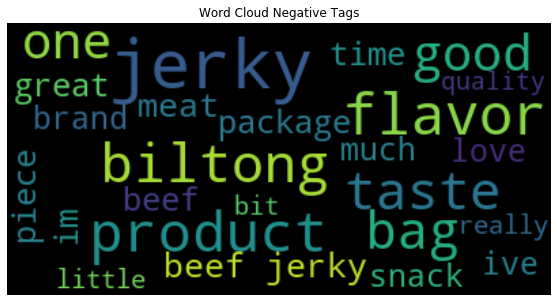

In [107]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(text2)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Negative Tags')
plt.show()